In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
data = pd.read_csv('dataset.csv')
data = data.drop(columns=['ID', 'age', 'sexe', 'sensibilite'])
data['diagnostic'].value_counts()


diagnostic
infection       103
inflammation     97
Name: count, dtype: int64

In [3]:
data

,douleur,gonflement,rougeur,pus,fivre,ganglions,diagnostic
0,intense,oui,oui,oui,oui,oui,infection
1,moderee,oui,oui,non,non,non,inflammation
2,legere,non,oui,non,non,non,inflammation
3,intense,oui,oui,oui,oui,oui,infection
4,moderee,non,oui,non,non,non,inflammation
...,...,...,...,...,...,...,...
195,intense,oui,oui,oui,oui,oui,infection
196,moderee,non,oui,non,non,non,inflammation
197,legere,oui,oui,non,non,non,inflammation
198,intense,oui,oui,oui,oui,oui,infection


In [4]:
data.replace({'oui': 1, 'non': 0}, inplace=True)

# Assuming 'data' is your DataFrame with the 'douleur' column
# Define an encoding map
encoding_map = {'legere': 0, 'moderee': 1, 'intense': 2}

# Apply ordinal encoding
data['douleur'] = data['douleur'].map(encoding_map)

C:\Users\Walid\AppData\Local\Temp\ipykernel_26100\425397873.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'oui': 1, 'non': 0}, inplace=True)


In [5]:
X = data.drop(columns=["diagnostic"]) 
X = pd.get_dummies(X)
y = data["diagnostic"]

In [6]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nCLassification Report :")


Accuracy: 1.0

CLassification Report :


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   infection       1.00      1.00      1.00        22
inflammation       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[22  0]
 [ 0 18]]


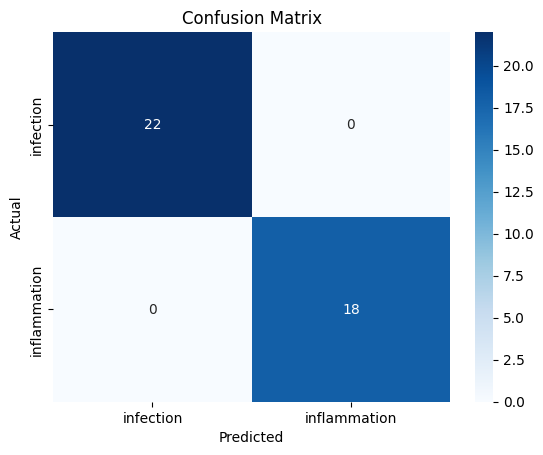

In [12]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# def predict_diagnosis(clf):
#     # Gather user input
    # age = int(input("Enter age: "))
    # sexe = input("Enter sexe (m/f): ")
    # douleur = input("Enter douleur (legere/moderee/intense): ")
    # gonflement = input("Enter gonflement (oui/non): ")
    # rougeur = input("Enter rougeur (oui/non): ")
    # pus = input("Enter pus (oui/non): ")
    # fivre = input("Enter fivre (oui/non): ")
    # ganglions = input("Enter ganglions (oui/non): ")
    # sensibilite = input("Enter sensibilite (positive/negative): ")
    
#     # Create a dictionary with the input data
#     input_data = {
#         "age": age,
#         "sexe": sexe,
#         "douleur": douleur,
#         "gonflement": gonflement,
#         "rougeur": rougeur,
#         "pus": pus,
#         "fivre": fivre,
#         "ganglions": ganglions,
#         "sensibilite": sensibilite
#     }
    
#     # Create a DataFrame from the input data
#     input_df = pd.DataFrame([input_data])
    
#     # Preprocess the input data (convert categorical variables into numerical format)
#     input_df = pd.get_dummies(input_df)
    
#     # Ensure the input_df has the same columns as X_train
#     input_df = input_df.reindex(columns=X_train.columns, fill_value=0)
    
#     # Make predictions
#     prediction = clf.predict(input_df)
#     return prediction[0]

# # Predict the diagnosis based on user input
# predicted_diagnosis = predict_diagnosis(clf)
# print("Predicted Diagnosis:", predicted_diagnosis)

In [14]:
# Save the model to a file
joblib_file = "random_forest_model.joblib"
joblib.dump(clf, joblib_file)


['random_forest_model.joblib']